# LForms

In [12]:
LoadPackage("num");

true

This writes to `prova.dat` the data needed to be displayed with `tikz`.

In [30]:
pintar:=function(lforma,generadores)
    local x, y, tmpdir, fnd, out;
    tmpdir := DirectoryCurrent();
    fnd := Filename( tmpdir, "prova.dat" );
    out := OutputTextFile(fnd, false);


    for x in lforma do
        for y in x do
            PrintTo(out,y,"|");
        od;
        PrintTo( out, x*generadores,"\n");
    od;
    CloseStream(out);
end;

function( lforma, generadores ) ... end

This function compiles the file `pintar.tex`.

In [31]:
tikztosvg:=function()
    local tmpdir, fn, header, ltx, svgfile, stream, svgdata, tojupyter;


    tmpdir := DirectoryCurrent();
    fn := Filename( tmpdir, "pintar" );

    ltx := Concatenation( "pdflatex -shell-escape --output-directory ",
                   Filename( tmpdir, "" ), " ",
                   Concatenation( fn, ".tex" ), " > ", Concatenation( fn, ".log2" ) );
    Exec( ltx );

    if not( IsExistingFile( Concatenation(fn, ".pdf") ) ) then
        tojupyter := rec( json := true, name := "stdout",
                          data := "No pdf was created; pdflatex is installed in your system?" );
    else
        svgfile := Concatenation( fn, ".svg" );
        ltx := Concatenation( "pdf2svg ", Concatenation( fn, ".pdf" ), " ",
                       svgfile, " >> ", Concatenation( fn, ".log2" ) );
        Exec( ltx );

        if not( IsExistingFile( svgfile ) ) then
            tojupyter := rec( json := true, name := "stdout",
                              data := "No svg was created; pdf2svg is installed in your system?" );
        else
            stream := InputTextFile( svgfile );
            if stream <> fail then
                svgdata := ReadAll( stream );
                tojupyter := rec( json := true, source := "gap",
                                  data := rec( ( "image/svg+xml" ) := svgdata ),
                                  metadata := rec( ( "image/svg+xml" ) := rec( width := 500, height := 500 ) ) );
                CloseStream( stream );
            else
                tojupyter := rec( json := true, name := "stdout",
                                  data := Concatenation( "Unable to render"), metadata := rec() );
            fi;
        fi;
    fi;
    return JupyterRenderable(tojupyter.data, tojupyter.metadata);
end;

function(  ) ... end

We define the semigroup, compute its Lshapes, and then print the first one.

In [24]:
s:=NumericalSemigroup(5,7,11,13);;
lforms:=LShapes(s);;
pintar(lforms[1],MinimalGenerators(s));

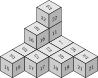

In [28]:
tikztosvg();

And now the second one.

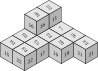

In [33]:
pintar(lforms[2],MinimalGenerators(s));
tikztosvg();